In [115]:
import numpy as np
import pandas as pd
import seaborn as sns

In [116]:
data=pd.read_csv('BlackFriday.csv')    # loading the dataset

In [117]:
data.head()    # 5 Starting rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [118]:
data.info()     # gives a basic overview of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [119]:
data.isnull().sum()  # gives the total null values in each column

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [120]:
data=data.dropna()    # deletes all the rows with null values

In [121]:
data.isnull().sum()  # after dropping all the null values, we've zero NULL values
# the problem is that we've lost a lots of data

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [122]:
# another way is to delete the column with the null values
del data['Product_Category_2']
del data['Product_Category_3']

In [123]:
data.head()      # product category 2 and 3 cloumns are deleted from the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,13055


In [124]:
# basically we've two ways to handle null values
# First is to delete all rows having null values
# second is to delete columns having null values
# but in both cases, we've loss of data.

In [125]:
data['User_ID'].unique()   # gives the list of all users

array([1000001, 1000004, 1000005, ..., 1000459, 1003043, 1003298],
      dtype=int64)

In [126]:
data['User_ID'].nunique()    # gives the count of all unique users

5868

In [127]:
data['Product_ID'].nunique()    # gives the count of all unique products

526

In [128]:
data['Purchase'].sum()        # gives the sum of all money used in purchasing goods

1915646035

In [129]:
data['Purchase'].sum()/len(data['Purchase'])   # avg money spend by a costumer (mean)

11661.001686166133

In [130]:
for i in data.columns:
    print(i)                # gives a list of all columns names

User_ID
Product_ID
Gender
Age
Occupation
City_Category
Stay_In_Current_City_Years
Marital_Status
Product_Category_1
Purchase


In [131]:
for i in data.columns:
    print(i,':',data[i].nunique())     # prints all the columns with their unique number of elements in that column

User_ID : 5868
Product_ID : 526
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 12
Purchase : 13839


In [132]:
data[data['Gender']=='M']       # prints all the rows with male gender

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,15665
18,1000007,P00036842,M,36-45,1,B,1,1,1,11788
19,1000008,P00249542,M,26-35,12,C,4+,1,1,19614
24,1000008,P00303442,M,26-35,12,C,4+,1,1,11927
...,...,...,...,...,...,...,...,...,...,...
537549,1004734,P00345842,M,51-55,1,B,1,1,2,13082
537551,1004735,P00313442,M,46-50,3,C,3,0,5,6863
537562,1004736,P00146742,M,18-25,20,A,1,1,1,11508
537571,1004737,P00221442,M,36-45,16,C,1,0,1,11852


In [133]:
print(  len(data[data['Gender']=='M'])  )       # gives the number of male costumers
print(  len(data[data['Gender']=='F'])  )       # gives the number of female costumers

127346
36932


In [134]:
newData=pd.DataFrame( {'SexRatio' : [ len(data[data['Gender']=='M']), len(data[data['Gender']=='F'])]}, index= ['Male', 'Females'])
# creating a new dataFrame with males and females only

In [135]:
newData

,SexRatio
Male,127346
Females,36932


<Axes: ylabel='SexRatio'>

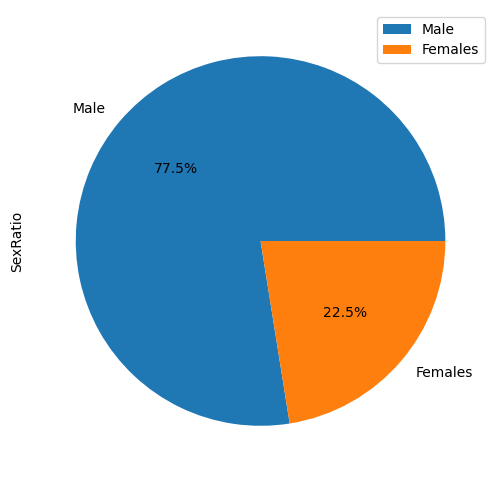

In [136]:
newData.plot.pie(y='SexRatio', figsize=(6,6), autopct='%0.1f%%')
# newData.plot.pie() creates a pie chart from the dataset
# figsize=(3,3) gives the dimensions/size to that pie chart
# autopct='%0.1f%%' assigns percentage in the pie chart

In [137]:
# groupby() is used to group columns
data.groupby('Gender').size()   # make groups of the column gender as Male and Female and printing size of each group

Gender
F     36932
M    127346
dtype: int64

<Axes: title={'center': 'SexRatioByPurchase'}>

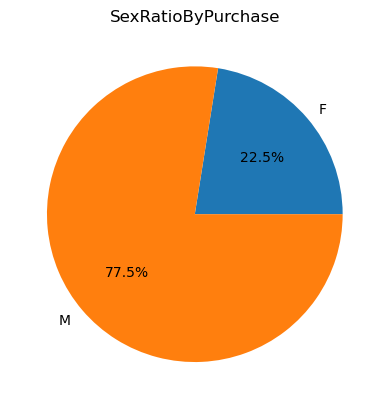

In [138]:
 # creates a pie chart without creating a newDataFrame
data.groupby('Gender').size().plot(kind='pie', autopct='%0.1f%%', title='SexRatioByPurchase')
# gives the number of males and females

<Axes: title={'center': 'SexRatioByPurchase'}, xlabel='Gender'>

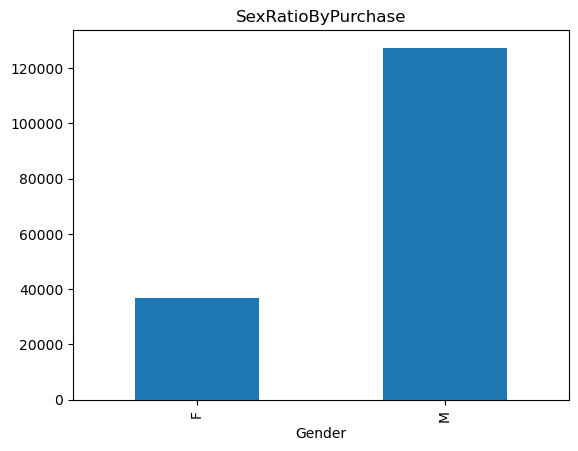

In [139]:
# bar chart of the same data
data.groupby('Gender').size().plot(kind='bar', title='SexRatioByPurchase')

In [140]:
data.groupby('Gender').sum()['Purchase']   # prints the total money spent on purchase by males and females

Gender
F     409569775
M    1506076260
Name: Purchase, dtype: int64

<Axes: title={'center': 'SexRatioByPurchase'}, ylabel='Purchase'>

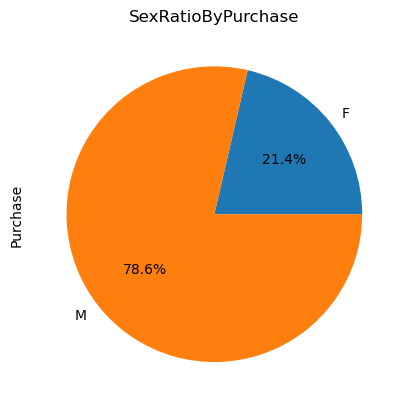

In [141]:
# groups the gender into M and F and summing up the purchase values based on grouping and making pie chart out from it. 
data.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct='%0.1f%%', title='SexRatioByPurchase')
# gives the number of purchases by males and females

<Axes: ylabel='Purchase'>

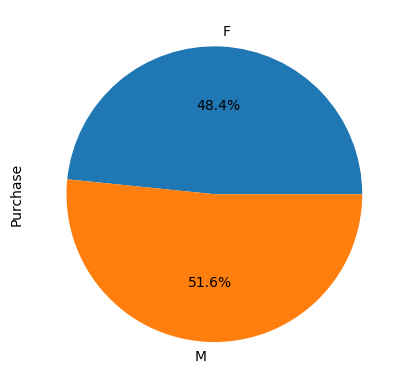

In [142]:
data.groupby('Gender')['Purchase'].mean().plot(kind='pie', autopct='%0.1f%%')
# this gives the avg. purchasing wrt the size of the males and females groups

In [143]:
data.groupby('Age').size()

Age
0-17      4789
18-25    30889
26-35    65916
36-45    32758
46-50    13135
51-55    11018
55+       5773
dtype: int64

<Axes: title={'center': 'Purchase distribution by age'}, xlabel='Age'>

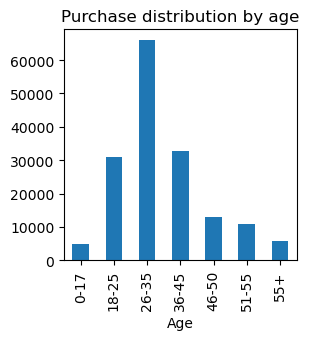

In [144]:
data.groupby('Age').size().plot(kind='bar', figsize=(3,3), title='Purchase distribution by age')
# plots a graph bw number of products purchased by the different age groups

In [145]:
for i in data['Age'].unique():
    print(i,len(data[data['Age']==i]))
# prints all the age groups alon with their purchases.

0-17 4789
46-50 13135
26-35 65916
51-55 11018
36-45 32758
18-25 30889
55+ 5773


<Axes: ylabel='Purchase'>

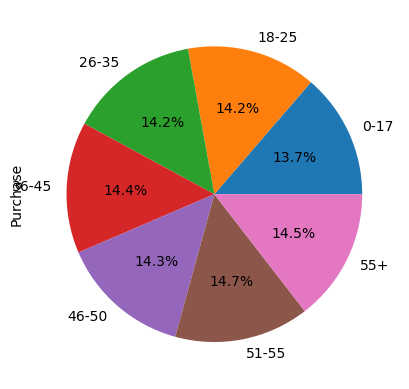

In [148]:
data.groupby('Age')['Purchase'].mean().plot(kind='pie',autopct='%0.1f%%')

<Axes: >

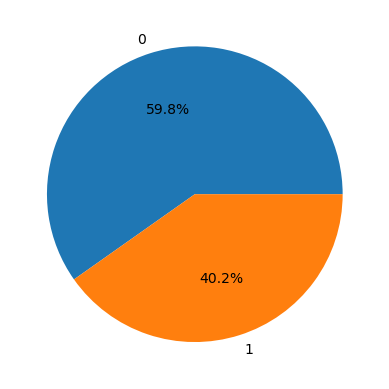

In [149]:
data.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f%%')

## Seaborn

<Axes: xlabel='Age', ylabel='count'>

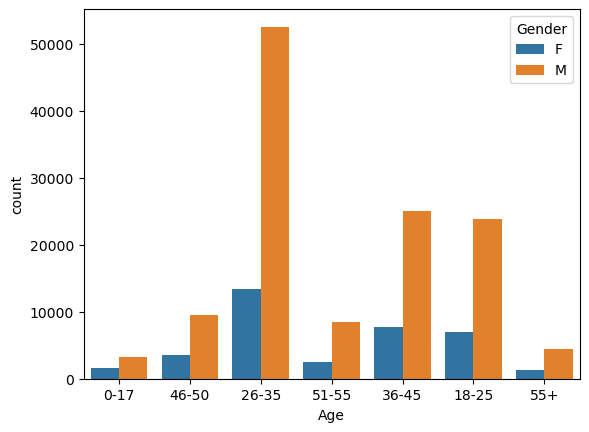

In [151]:
# seaborn library is used to represent data in a good looking format/plot
sns.countplot(x='Age',hue='Gender',data=data)

<Axes: xlabel='Marital_Status', ylabel='count'>

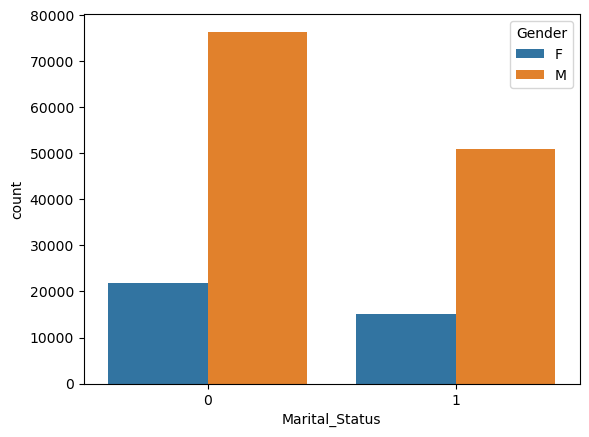

In [152]:
sns.countplot(x='Marital_Status',hue='Gender',data=data)

<Axes: xlabel='Age', ylabel='count'>

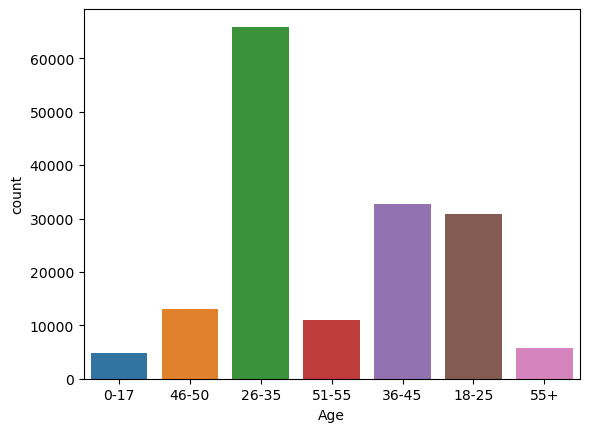

In [159]:
sns.countplot(x=data['Age'])    # makes a count plot of ages

<Axes: >

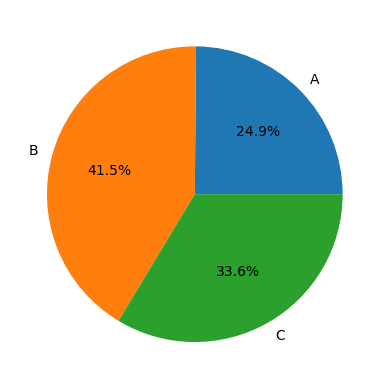

In [170]:
data.groupby('City_Category').size().plot(kind='pie', autopct='%0.1F%%')

<Axes: xlabel='Age', ylabel='count'>

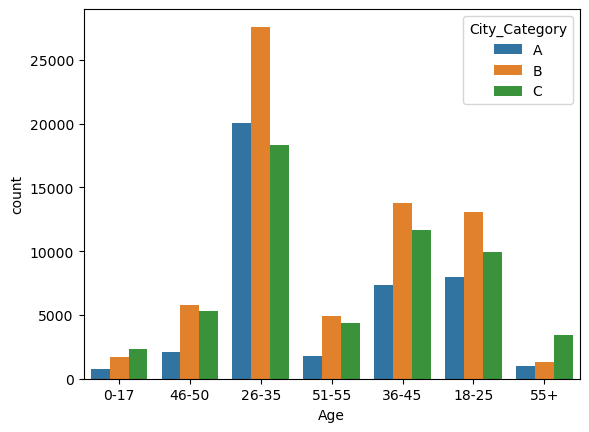

In [174]:
sns.countplot(x='Age',hue='City_Category',data=data)